# Выбор локации для скважины

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1">Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общие-сведения-о-полученных-данных." data-toc-modified-id="Общие-сведения-о-полученных-данных.-1.1">Общие сведения о полученных данных.</a></span><ul class="toc-item"><li><span><a href="#Регион-1." data-toc-modified-id="Регион-1.-1.1.1">Регион 1.</a></span></li><li><span><a href="#Регион-2." data-toc-modified-id="Регион-2.-1.1.2">Регион 2.</a></span></li><li><span><a href="#Регион-3." data-toc-modified-id="Регион-3.-1.1.3">Регион 3.</a></span></li></ul></li><li><span><a href="#Исключение-данных." data-toc-modified-id="Исключение-данных.-1.2">Исключение данных.</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2">Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Регион-1." data-toc-modified-id="Регион-1.-2.1">Регион 1.</a></span></li><li><span><a href="#Регион-2." data-toc-modified-id="Регион-2.-2.2">Регион 2.</a></span></li><li><span><a href="#Регион-3." data-toc-modified-id="Регион-3.-2.3">Регион 3.</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3">Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Стоимость-разработки-одной-скважины" data-toc-modified-id="Стоимость-разработки-одной-скважины-3.1">Стоимость разработки одной скважины</a></span></li><li><span><a href="#Минимальный-объем-запасов-для-окупаемости" data-toc-modified-id="Минимальный-объем-запасов-для-окупаемости-3.2">Минимальный объем запасов для окупаемости</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4">Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Регион-1." data-toc-modified-id="Регион-1.-4.1">Регион 1.</a></span></li><li><span><a href="#Регион-2." data-toc-modified-id="Регион-2.-4.2">Регион 2.</a></span></li><li><span><a href="#Регион-3." data-toc-modified-id="Регион-3.-4.3">Регион 3.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li>

<h1>Легенда исследования</h1>
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Ход проведения работы:
1. Исследование полученных данных.
2. Создание и обучение модели для предсказания объема сырья в скважине.
3. Подготовительные расчеты для вычисления прибыли.
4. Разработка функции расчета прибыли для 200 лучших пердсказаний.
5. Расчет распределения прибыли, среднего значения и вероятности убытков.
6. Подведение общих итогов и рекомендации по выбору региона для разработки.


## Загрузка и подготовка данных

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sb
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState

### Общие сведения о полученных данных.

Нам предоставлены данные по трем регионам. Данные должны содержать информацию по отдельным скважинам - ключевые признаки и объем запасов нефти в скважине. Рассмотрим полученные данные по отдельности.

Создадим функцию, которая будет давать нужную нам информацию для региона.

In [47]:
def info_research(data):
  print('Пример строк из таблицы')
  display(data.head())
  print('Общие данные о полученной таблице')
  data.info()
  print('Гистограмма распределения значений')
  data.hist(bins=20, figsize=(9, 9))
  plt.show()
  print('Ящик с усми для признаков')
  for param in ['f0', 'f1', 'f2']:
    data.boxplot(column=param)
    plt.show()
  print('Корреляция признаков')
  sb.heatmap(data.corr(), annot=True)
  plt.show()

#### Регион 1.

In [48]:
# Данные геологоразведки региона 1
try:
    data_area_1 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_area_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')

Пример строк из таблицы


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Общие данные о полученной таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Гистограмма распределения значений


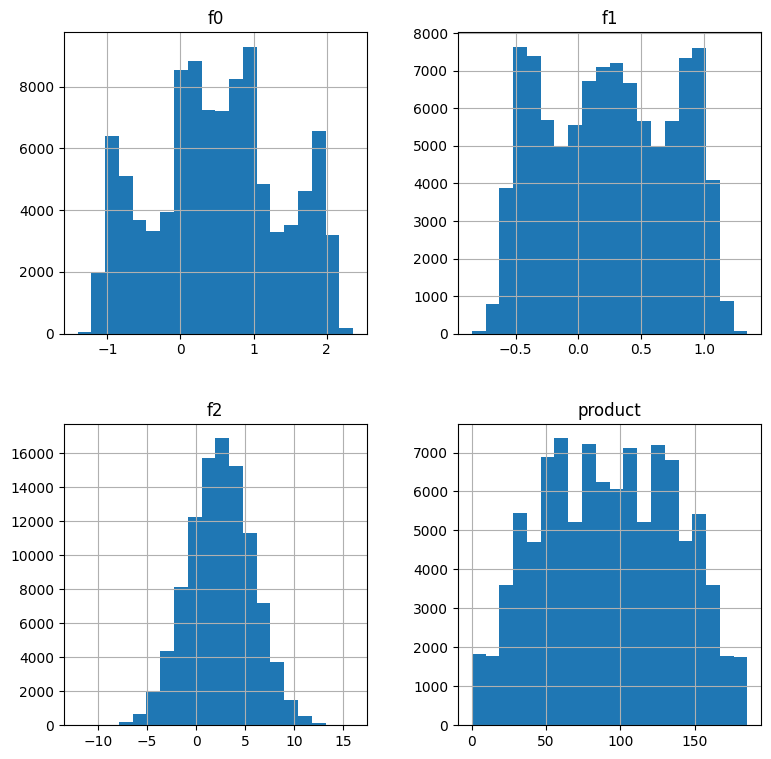

Ящик с усми для признаков


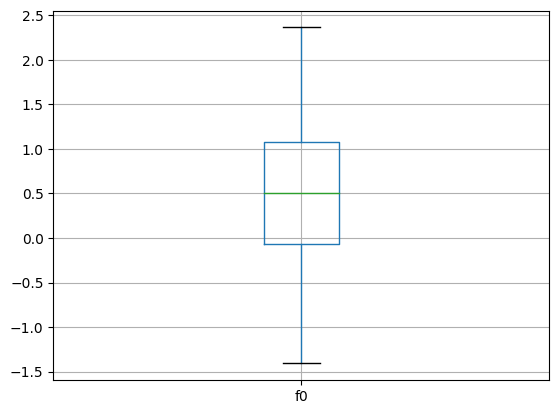

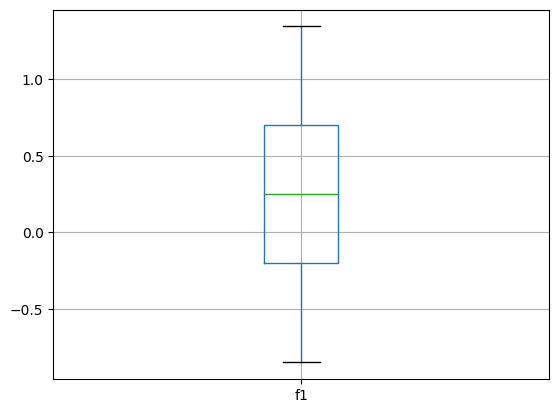

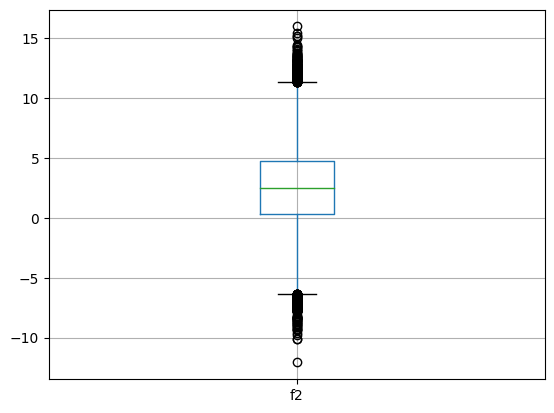

Корреляция признаков


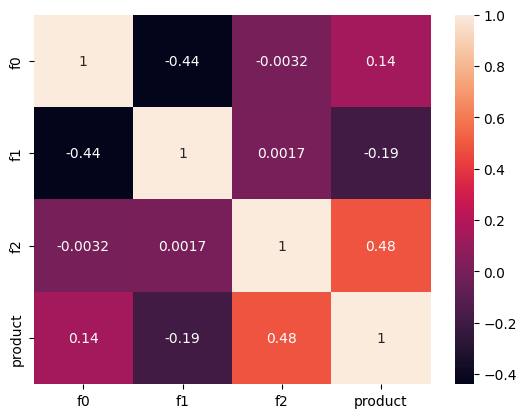

In [49]:
info_research(data_area_1)

По данным о первом регионе мы имеем 100.000 уникальных скважин со следующими показателями:
- индивидуальный номер(id)
- показатели скважины по ключевым признакам(f0, f1, f2)
- объем запасов в скважине в тыс. баррелей(product).

Пропущенных значений в данных не обнаружено. Существуют выбросы в показателе признака f2, так как его распределение ближе к нормальному. В значениях остальных параметнов наболюдаются по несколько пиков.

По таблице корреляции можно заметить значимое влияние параметра f2 на объем запасов скважины.

#### Регион 2.

In [50]:
# Данные геологоразведки региона 2
try:
    data_area_2 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_area_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')

Пример строк из таблицы


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Общие данные о полученной таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Гистограмма распределения значений


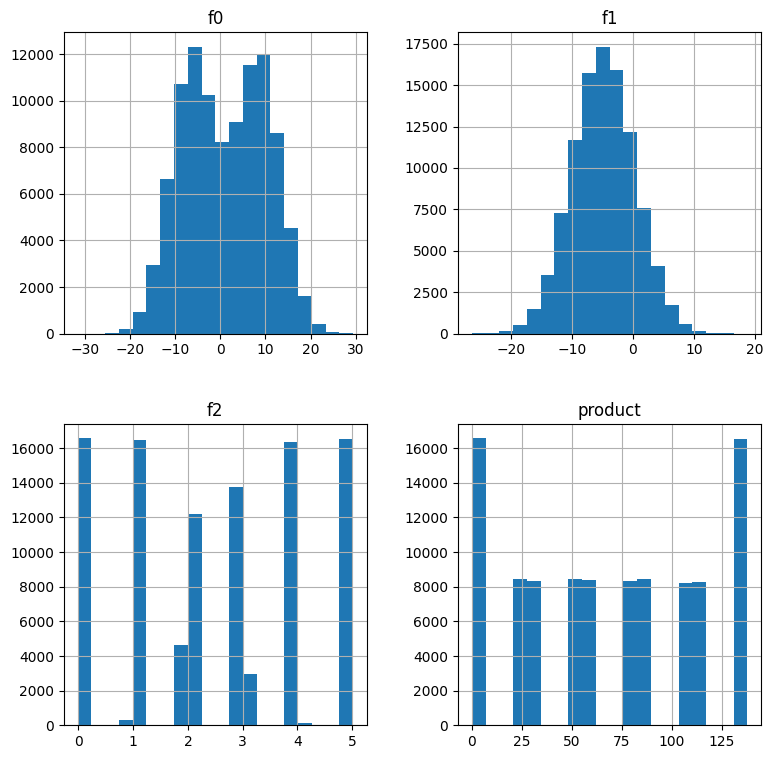

Ящик с усми для признаков


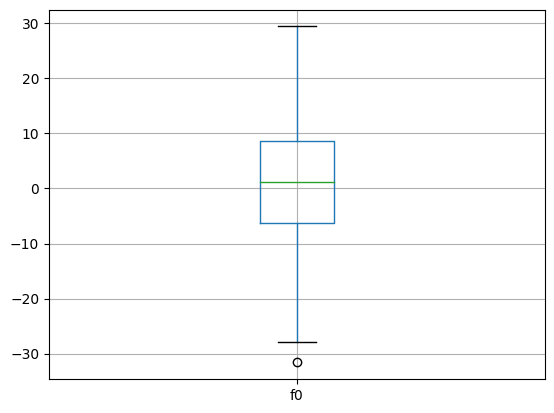

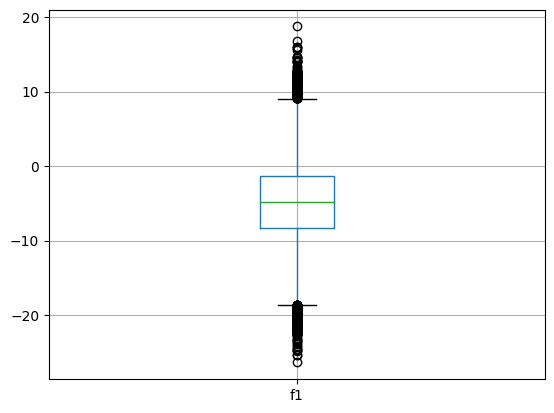

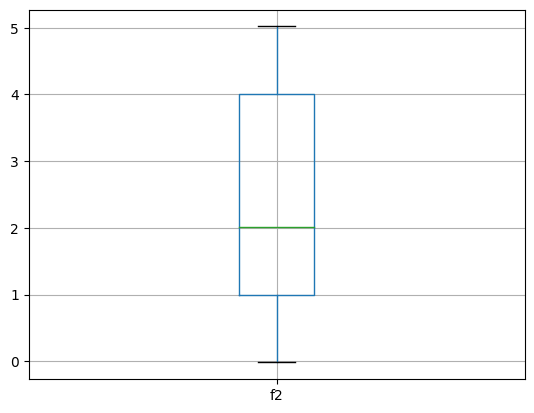

Корреляция признаков


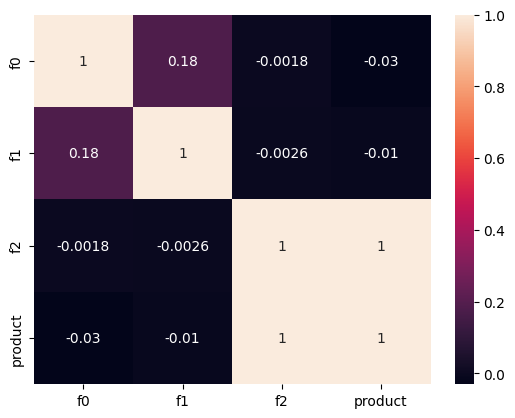

In [51]:
info_research(data_area_2)

По данным о втором регионе мы имеем 100.000 уникальных скважин со следующими показателями:
- индивидуальный номер(id)
- показатели скважины по ключевым признакам(f0, f1, f2)
- объем запасов в скважине в тыс. баррелей(product).

Пропущенных значений в данных не обнаружено. Существуют выбросы в показателе признака f2, в остальном распределение данных стремиться к нормальному. В признаке f1 наблюдается бимодальное распределение, у остальных - распределение гребенчатого типа.

Между объемом запаса скважины и параметром f2 существует сильная линейная зависимость. 

#### Регион 3.

In [52]:
# Данные геологоразведки региона 3
try:
    data_area_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_area_3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Пример строк из таблицы


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Общие данные о полученной таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Гистограмма распределения значений


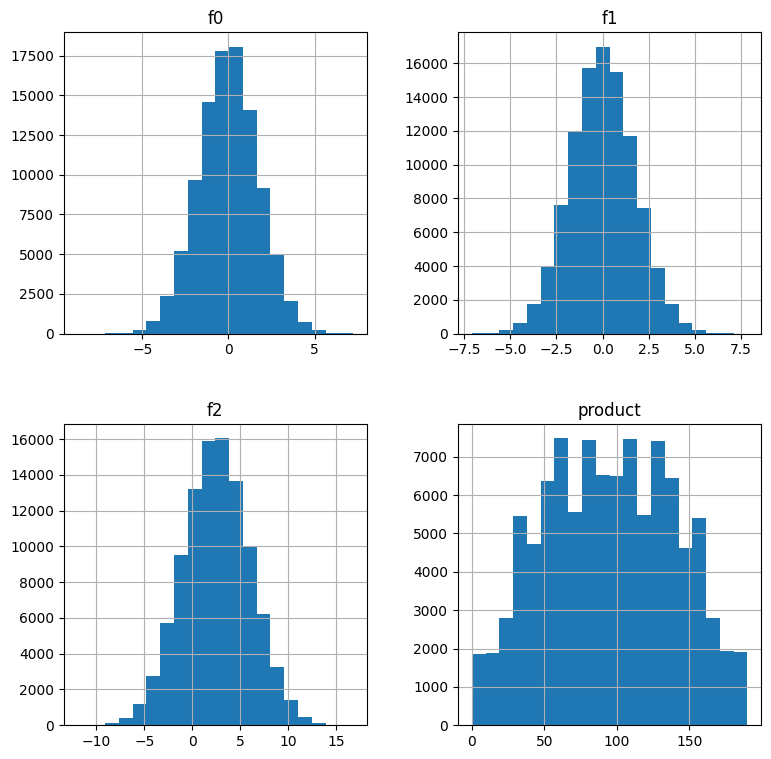

Ящик с усми для признаков


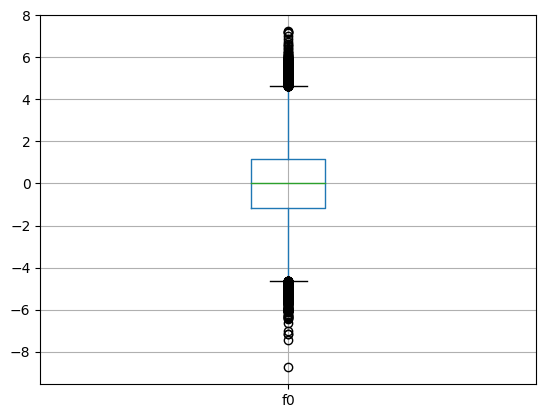

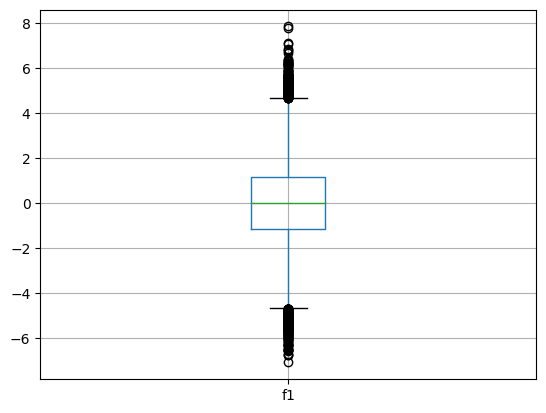

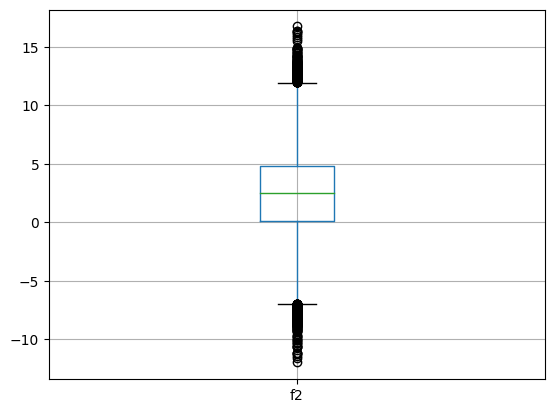

Корреляция признаков


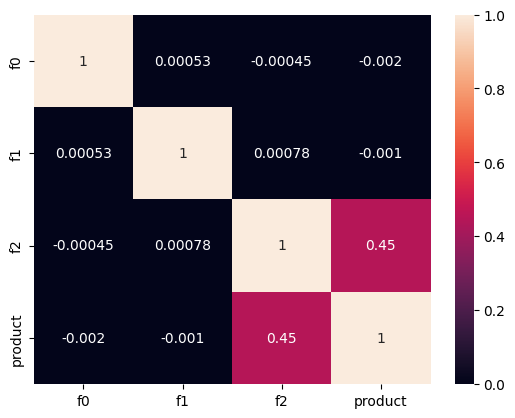

In [53]:
info_research(data_area_3)

По данным о третьем регионе мы имеем 100.000 уникальных скважин со следующими показателями:
- индивидуальный номер(id)
- показатели скважины по ключевым признакам(f0, f1, f2)
- объем запасов в скважине в тыс. баррелей(product).

Пропущенных значений в данных не обнаружено. Для всех трех признаков характерно нормальное распределение, также во всех трех признаках наблюдаются выбросы. 

Самая блольшое влияние на объем запасов имеет параметр f2, остальные же параметры практически не влияют. 

### Исключение данных.

В дальнейшем исследовании нам не так важны уникальные имена скважин. Для повышения эфективности обучения предсказывающих моделей исключим их из обрабатываемых данных.

In [54]:
data_area_1 = data_area_1.drop(columns = ['id'],axis = 1)

In [55]:
data_area_2 = data_area_2.drop(columns = ['id'],axis = 1)

In [56]:
data_area_3 = data_area_3.drop(columns = ['id'],axis = 1)

## Обучение и проверка модели

Для предсказаний выберем модель литейной регрессии, так как она самая предсказыема из моделей. Так как у каждого региона есть свои особенности, создадим и обучим модель для каждого региона отдельно. В качестве главного критерия выберем среднеквадратичную ошибку. Для деления на обучающую и валидационную выборки выберем соотношение 3:1.

In [57]:
# функция для создания предсказаний
def predict_product(area):
    
    features_data_area = area.drop(['product'], axis=1)
    target_data_area = area['product']
    
    # разделим данные на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = \
            train_test_split(features_data_area, target_data_area,
                             test_size=0.25, random_state=12345)
    # модель линейной регрессии
    model = LinearRegression()
    
    model.fit(features_train, target_train)
    
    # предсказание на валидационной выборке
    predict_area = model.predict(features_valid)
    
    # среднеквадратичная ошибка
    rmse = mean_squared_error(predict_area, target_valid)**0.5

    return rmse, predict_area, target_valid

### Регион 1.

In [58]:
rmse_1, predict_area_1, product_area_1 = predict_product(data_area_1)

In [59]:
print ('Среднеквадратичная ошибка:', '%.2f' % rmse_1 , 'тыс. баррелей')
print ('Средний объем запасов:', '%.2f' % (predict_area_1.mean()), 'тыс. баррелей')

Среднеквадратичная ошибка: 37.58 тыс. баррелей
Средний объем запасов: 92.59 тыс. баррелей


Среднеквадратичная ошибка на моделях для региона 1 состовляет 37,58 тыс. баррелей, а среднее предсказаниее объема 92,59 тыс. баррелей. Это означает, что у модели получается достаточно большой разброс предсказанных значений относительно истинных. Скорее всего, это связано с особенностями данного региона. Для построения более точной модели прогназирования рекомендовано произвести более детальный анализ региона, с делением его на кластеры/секторы по дополнительным признакам.

### Регион 2.

In [60]:
rmse_2, predict_area_2, product_area_2 = predict_product(data_area_2)

In [61]:
print ('Среднеквадратичная ошибка:', '%.2f' % rmse_2 , 'тыс. баррелей')
print ('Средний объем запасов:', '%.2f' % (predict_area_2.mean()), 'тыс. баррелей')

Среднеквадратичная ошибка: 0.89 тыс. баррелей
Средний объем запасов: 68.73 тыс. баррелей


Среднеквадратичная ошибка на модели для региона 2 состовляет 0,89 тыс. баррелей, а среднее предсказаниее объема 68,73 тыс. баррелей. Точность предсказаний значений в данном регионе достаточно высокая относительно истинных значений.

### Регион 3.

In [62]:
rmse_3, predict_area_3, product_area_3 = predict_product(data_area_3)

In [63]:
print ('Среднеквадратичная ошибка:', '%.2f' % rmse_3 , 'тыс. баррелей')
print ('Средний объем запасов:', '%.2f' % (predict_area_3.mean()), 'тыс. баррелей')

Среднеквадратичная ошибка: 40.03 тыс. баррелей
Средний объем запасов: 94.97 тыс. баррелей


Среднеквадратичная ошибка на модели для региона 3 состовляет 40,03 тыс. баррелей, а среднее предсказаниее объема 94,97 тыс. баррелей. Что является значительным отклонением от истинных значений.  Скорее всего, это связано с особенностями данного региона. Для построения более точной модели прогназирования рекомендовано произвести более детальный анализ региона, с делением его на кластеры/секторы по дополнительным признакам.

## Подготовка к расчёту прибыли

Так как у исследуемых регионов одинаковые условия бюджета и стоимости, нет необходимости производить следующие расчеты для каждого региона в отдельности.

### Стоимость разработки одной скважины

Расчитаем среднюю стоимость разработки одной скважины, зная, что бюджет на один регион составляет 10 млрд рублей, а планируется разработать 200 лучших скважин в регионе. Расчёт произведем сразу в тысячах, чтобы не запутаться далее в нулях.


In [64]:
budget = 10000000

In [65]:
selected_wells = 500

In [66]:
best_wells = 200

In [67]:
price_1000_barrels = 450 

In [68]:
well_price = budget / best_wells
print('Бюджет одной скважины -', well_price, 'тыс. рублей.')

Бюджет одной скважины - 50000.0 тыс. рублей.


### Минимальный объем запасов для окупаемости

На разработку одной скважины запланировано тратить примерно 50 млн. рублей. Мы уже знаем, что 1000 баррелей стоит 450 тыс. рублей. Посчитаем, какой минимальный объем запаса должен быть в скважине, чтобы покрыть расходы на её выработку. 

In [69]:
amount_payback = round(well_price / price_1000_barrels, 2)
print('Объем запаса для окупаемости скважины -', 
      '%.2f' %amount_payback, 'тыс. баррелей.')

Объем запаса для окупаемости скважины - 111.11 тыс. баррелей.


Для того чтобы разработка скважины окупилась, объем запасов нефти в ней должен быть не менее 111,11 тыс. баррелей. Среднее предсказание в регионах 1, 2 и 3 - 92,5, 68,5 и 95,0 соответственно. получается, что по усредненным показателям ни в одном регионе усредненный объем запаса в скважине не привышает расчетный объем для окупаемости.

## Расчёт прибыли и рисков 

Создадим функцию, которая выбирает 500 случайных скважин из списка и считает общую прибыльность для 200 лучших скважин из них.
Для упрощения расчетов будем считать, что бюджет включает всебя все расходы по разрботке скважин.

In [70]:
# функция для расчета прибыли 
def profit(predict, target, count):

    probs_sorted = predict.sort_values(ascending=False)
    selected = target[probs_sorted.index].iloc[:count]
    
    finance = selected.sum()*price_1000_barrels - budget

    return finance

Проверим работу функции на данных по каждому региону.

In [71]:
test = profit(pd.Series(predict_area_1).reset_index(drop=True),
              pd.Series(product_area_1).reset_index(drop=True), 
              best_wells)
print('Рерион 1')
print('Фактическая прибыль для 200 лучших предсказаний региона составляет',
      '%.2f' % test, 'тыс. рублей.')

Рерион 1
Фактическая прибыль для 200 лучших предсказаний региона составляет 3320826.04 тыс. рублей.


In [72]:
test = profit(pd.Series(predict_area_2).reset_index(drop=True),
              pd.Series(product_area_2).reset_index(drop=True),
              best_wells)
print('Рерион 2')
print('Фактическая прибыль для 200 лучших предсказаний региона составляет',
      '%.2f' % test, 'тыс. рублей.')

Рерион 2
Фактическая прибыль для 200 лучших предсказаний региона составляет 2415086.70 тыс. рублей.


In [73]:
test = profit(pd.Series(predict_area_3).reset_index(drop=True),
              pd.Series(product_area_3).reset_index(drop=True), 
              best_wells)
print('Рерион 3')
print('Фактическая прибыль для 200 лучших предсказаний региона составляет',
      '%.2f' % test, 'тыс. рублей.')

Рерион 3
Фактическая прибыль для 200 лучших предсказаний региона составляет 2710349.96 тыс. рублей.


Функция работает. прибыль по 200 лучших предсказаний во всех регионах превышаел 2,4 млрд рублей.

Теперь можем перейти непосредственно к расчетам. Для расчетов воспользуемся техникой бутстреп с 1000 выборок. Доверительный интервал возьмем 95%.

In [74]:
def bootstrap(predict_area, product_area):
    
    state = np.random.RandomState(12345)
    values = []  
    area = pd.DataFrame(data=predict_area, 
                        columns=['predict']).reset_index(drop=True)
    area['product'] = pd.DataFrame(product_area).reset_index(drop=True)
    
    for i in range(1000):
        subsample = area.sample(n=selected_wells, 
                                replace=True, 
                                random_state=state)
        subsample = subsample.reset_index(drop=True)
        
        values.append(profit(subsample['predict'],
                             subsample['product'], 
                             best_wells))
    
    values = pd.Series(values)
        
    lower = values.quantile(0.025)
    upper = values.quantile(0.925)
    
    loss = values[values < 0].count() / len(values) * 100
       
    print('Прогнозируемый доверительный интервал фактической ' +
          'прибыли:', '%.2f' % lower, '-', '%.2f' % upper, 'тыс. рублей.')
    print('Средняя фактическая прибыль региона:', '%.2f' % values.mean(),
          'тыс. рублей.')
    print('Вероятность получения убытков в регионе:', '%.2f' % loss, '%.')

### Регион 1.

In [75]:
bootstrap(predict_area_1, product_area_1)

Прогнозируемый доверительный интервал фактической прибыли: -111215.55 - 789980.12 тыс. рублей.
Средняя фактическая прибыль региона: 396164.98 тыс. рублей.
Вероятность получения убытков в регионе: 6.90 %.


### Регион 2.

In [76]:
bootstrap(predict_area_2, product_area_2)

Прогнозируемый доверительный интервал фактической прибыли: 33820.51 - 758936.83 тыс. рублей.
Средняя фактическая прибыль региона: 456045.11 тыс. рублей.
Вероятность получения убытков в регионе: 1.50 %.


### Регион 3.

In [77]:
bootstrap(predict_area_3, product_area_3)

Прогнозируемый доверительный интервал фактической прибыли: -163350.41 - 787873.20 тыс. рублей.
Средняя фактическая прибыль региона: 404403.87 тыс. рублей.
Вероятность получения убытков в регионе: 7.60 %.


**Вывод** 

Следующие выводы были написаны на основании динамических данных с повышенной случайностью, из-за чего при запуске функции bootstrap получались не стачичные значения, по которым были сделаны наблюдения о вариабильности процента убытков в размере 1,5% для каждого из регионов. Вариабильность остальных параметров не выявлялась так однозначно(за исключением знака областей начала и конца доверительного интервала).

По нашим расчетам видно, что вероятность убыточности регионов 1(6,9%) и 3(7,6%) значительно превышает значение региона 2(1,5%). Доверительный интервал значений фактической прибыыли/убыточности для регионов 1(-111.22 - 789.98 млн. руб.) и 3(-163.35 - 787.87 млн. руб.) также имеет больший разброс как в положительной(прибыль), так и в отридцательной(убыток) области. В регионе 2 разброс значений прибыли (33.82 - 758.94 млн. руб.). Средняя фактическая прибыль 200 лучших прогнозов для случайного набора скважин по регионам составляет: 396.17 млн. рублей, 456.05 млн. рублей и 404.40 млн. рублей, соответственно.

## Общий вывод

Была проведена работа по анализу полученных данных, на их основании были построены и обучены модели прогнозов объема запасов нефти и проведены расчеты прибыли и рисков по каждому региону.

**1. Исследование полученных данных.**

В ходе исследования данных была обнаружена сильная взаимосвязь объемов запасов скважины с признаком f2 во всех трех регионах. 

**2. Создание и обучение модели для предсказания объема сырья в скважине.**

При обучении моделей самая высокая точность предсказаний получилась в регионе 2(среднеквадратичное отклонение предсказания составляет 0.89 тыс. баррелей), в регионах 1 и 3 предсказания моделей значительно хуже (среднеквадратичная ошибка - 37.58 тыс. баррелей и 40.03 тыс. баррелей соответственно). Однако, средний предсказанный объем в регионах 1(92.59 тыс. баррелей) и 3(94.97 тыс. баррелей) выше среднего прогнозируемого объема запасов в регионе 2(68.73 тыс. баррелей).

**3. Подготовительные расчеты для вычисления прибыли.**

На основании полученных данных усредненный бюджет разработки одной скважины составляет 50.00 млн. рублей. Из этого следует, что для окупаемости разработки скважины Объем запаса должен составлять не менее 111.11 тыс. баррелей, что привышает средний прогназируемый объем во всех трех регионах. 

**4. Разработка функции расчета прибыли для 200 лучших предсказаний.**

Фактическая прибыль для 200 лучших предсказаний региона составляет :
- регион 1 - 3.32 млрд. рублей
- регион 2 - 2.42 млрд. рублей
- регион 3 - 2.71 млрд. рублей

**5. Расчет распределения прибыли, среднего значения и вероятности убытков.**

Вероятность убытков в регионах:
- регион 1 - 6,9%
- регион 2 - 1,5%
- регион 3 - 7,6%

Доверительный интервал значений фактической прибыыли/убыточности для регионов:
- регион 1 - (-111.22 - 789.98 млн. руб.)
- регион 2 - (33.82 - 758.94 млн. руб.)
- регион 3 - (-163.35 - 787.87 млн. руб.)

Средняя фактическая прибыль 200 лучших прогнозов для случайного набора скважин по регионам:
- регион 1 - 396.17 млн. рублей
- регион 2 - 456.05 млн. рублей
- регион 3 - 404.40 млн. рублей


**Вывод:** На основании более высокой точности предсказаний обученной в исследовании модели и высокой прибыльности для разработки предлагается регион 2.